<H2>
<B>TOPIC    :</B> SINGLE AND MULTIPLE REGRESSION <br>
<B><CENTER>MARKETING ANALYTICS</CENTER></B> </h2>

##<b>Importing the packages</b>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from  scipy import stats
plt.rc('figure',figsize=(20,10))

#Splitting the data
from sklearn.model_selection import train_test_split

#Caculating the performance
from sklearn import metrics

#Package for evaluating the model
from sklearn.metrics import classification_report,confusion_matrix

##<b>Load the data set</b>

In [ ]:
data= pd.read_csv('/content/pseudo_facebook.csv')
data

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98998,1268299,68,4,1945,4,female,541.0,2118,341,3996,18089,3505,11887,491,6202
98999,1256153,18,12,1995,3,female,21.0,1968,1720,4401,13412,4399,10592,2,2820
99000,1195943,15,10,1998,5,female,111.0,2002,1524,11959,12554,11959,11462,0,1092
99001,1468023,23,11,1990,4,female,416.0,2560,185,4506,6516,4506,5760,0,756


In [ ]:
data.shape

(99003, 15)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   userid                 99003 non-null  int64  
 1   age                    99003 non-null  int64  
 2   dob_day                99003 non-null  int64  
 3   dob_year               99003 non-null  int64  
 4   dob_month              99003 non-null  int64  
 5   gender                 98828 non-null  object 
 6   tenure                 99001 non-null  float64
 7   friend_count           99003 non-null  int64  
 8   friendships_initiated  99003 non-null  int64  
 9   likes                  99003 non-null  int64  
 10  likes_received         99003 non-null  int64  
 11  mobile_likes           99003 non-null  int64  
 12  mobile_likes_received  99003 non-null  int64  
 13  www_likes              99003 non-null  int64  
 14  www_likes_received     99003 non-null  int64  
dtypes:

##<b>Handling the missing values</b>

In [ ]:
data.isnull().sum()

userid                     0
age                        0
dob_day                    0
dob_year                   0
dob_month                  0
gender                   175
tenure                     2
friend_count               0
friendships_initiated      0
likes                      0
likes_received             0
mobile_likes               0
mobile_likes_received      0
www_likes                  0
www_likes_received         0
dtype: int64

We have the 175 null values in the gender column and 2 null values in the tenure column. We have 99003 records with 15 attributes. So, by droping the 177 null values will not effect the pattern. So, I am dropping the null values in the present data set. 

In [ ]:
data=data.dropna()
data.isnull().sum()

userid                   0
age                      0
dob_day                  0
dob_year                 0
dob_month                0
gender                   0
tenure                   0
friend_count             0
friendships_initiated    0
likes                    0
likes_received           0
mobile_likes             0
mobile_likes_received    0
www_likes                0
www_likes_received       0
dtype: int64

After dropping the values there are no null values. 

In [ ]:
data.shape

(98826, 15)

##<b>Checking the categorical values in the data</b>

In [ ]:
categorical=[col for col in data.columns if data[col].dtype=='object']
for i,j in enumerate(categorical):
    print("{0}: {1} has the unique elements:{2}".format(i+1,j,data[j].unique()))

1: gender has the unique elements:['male' 'female']


So, we have only one categorical column value, in the given data set.

In [ ]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 
data['gender']= le.fit_transform(data['gender']) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


##<h3><b>Correlation Heatmap</h3></b>

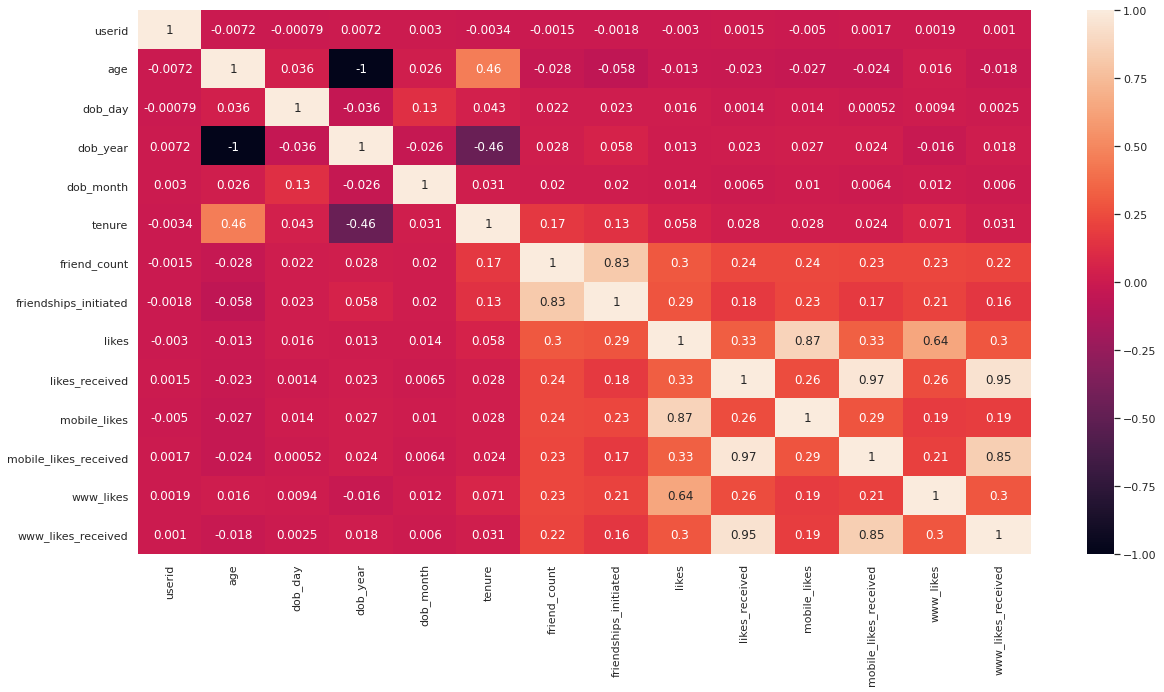

In [ ]:
sns.heatmap(data.corr('pearson'),annot=True)

<h3><i>
The age is positively related to all kinds of likes. Moreover, we donnot require the userid for predicting the age group bin so we drop the userid column. And for predicting the age group I am even dropping the age attribute. 
</h3></i>


##<h3><b>Standardising the data</h3></b>

In [ ]:
mean, std = np.mean(data, axis=0), np.std(data, axis=0)
stand_data = (data - mean) / std

##<h3><b>Plotting the Linear Regression Plot</b><h3>

(0.0, 7498.460687714771)

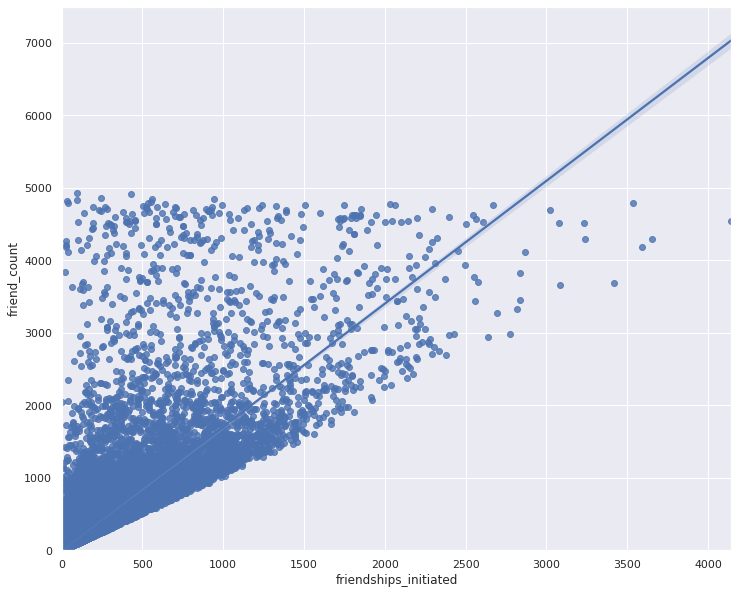

In [ ]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="friendships_initiated", y="friend_count", data=data)
plt.ylim(0,)

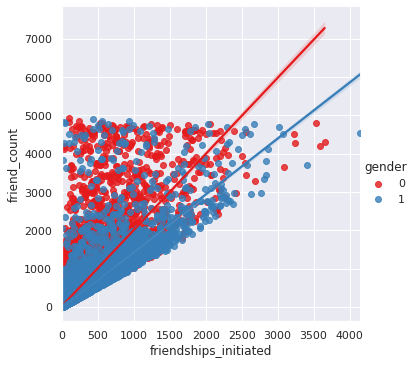

In [ ]:
sns.lmplot(y='friend_count', x='friendships_initiated',data=data,hue='gender',palette='Set1')

#<h2><b>SINGLE LINEAR REGRESSION</B></H2>

##<h3><b>Splitting the Data to train and test<h3></b>

In [ ]:
#Linear Regression Model
from sklearn.linear_model import LinearRegression

In [ ]:
x = data[['friendships_initiated']]
y = data[['friend_count']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

##<h3><b>Fitting the Regression Model<h3></b>

In [ ]:
lm = LinearRegression()
lm.fit(x_train,y_train)
y_pred=lm.predict(x_test)

##<h3><b>Evaluating the model</b></h3>

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 72.04077762435564
Mean Squared Error: 50979.48952797545
Root Mean Squared Error: 225.78638029778378


The root mean square must be less than 180, but our model have 225 which is not extremely good. 

In [ ]:
r_sq = lm.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.6818059957472711


The linear regression for predicting the friend count with respect to the friendships_initiated is 68% efficient. 

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


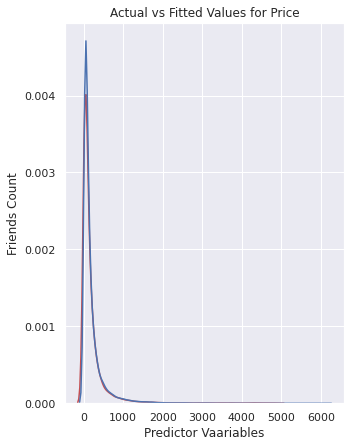

In [ ]:
plt.figure(figsize=(5, 7))


ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values",ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Predictor Vaariables')
plt.ylabel('Friends Count')

plt.show()
plt.close()

#<h2><b>MULTIPLE REGRESSION</B></H2>

##<h3><b>Splitting the Data to train and test<h3></b>

In [ ]:
x = data.drop('friend_count',axis=1)
y = data[['friend_count']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [ ]:
x = data[['friendships_initiated','likes','likes_received']]
y = data[['friend_count']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [ ]:
e_data=data.iloc[:, 5:]
x = e_data.drop('friend_count',axis=1)
y = e_data[['friend_count']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

##<h3><b>Fitting the Regression Model<h3></b>

In [ ]:
lm = LinearRegression()
lm.fit(x_train,y_train)
y_pred=lm.predict(x_test)

##<h3><b>Evaluating the model</b></h3>

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 72.54595509385786
Mean Squared Error: 48166.65722765822
Root Mean Squared Error: 219.46903478089618


The root mean square must be less than 180, but our model have 219 which is not extremely good. 

In [ ]:
r_sq = lm.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.6984192286101224


The multiple regression for predicting the friend count with respect to the friendships_initiated, likes and likes_received is 69% efficient. 

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


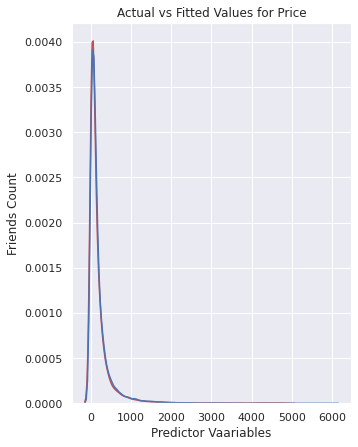

In [ ]:
plt.figure(figsize=(5, 7))


ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Predictor Vaariables')
plt.ylabel('Friends Count')

plt.show()
plt.close()